
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

# Práctica 5 (Parte III). Transformada Wavelet

## Introducción
La transformada wavelet nos permite representar una imagen es un espacio escala-orientación. La escala representa la información de un determinado tamaño. Por ejemplo si la escala es baja veremos estructuras pequeñas, p.e información de cambios rápidos en intesidad, como son las aristas. La información de orientación te permite ver las estructuras que están en determinada orientación. Para tal fin la transformada wavelet usa una función wavelet, denominada la función wavelet madre y una funcion de suavizado denominada de aproximación. Cuando aplicamos la transformada wavelet obtenemos dos tipos información: la de detalle y la de aproximación. La de detalle es la información que representa cambios rapidos. Y la aproximación es una versión de la imagen original pero con menor detalle, una versión suavizada. Así para una imagen aplicando una vez la transformada wavelet obtendremos una información de aproximación, informacion de detalle en horizontal, vertical y diagonal. Todas estas informaciones son imágenes de dimensiones la mitad de la original. Se puede aplicar otras vez sobre la aproximación la transformada. 
El numero de veces que se aplica esta descomposición se denomina el numero de niveles o escalas. 
En los ejemplos que veremos a continuación usaremos la libreria <a link= https://pywavelets.readthedocs.io/en/latest/install.html>PyWavelets </a>. Para instalar esta librearia podéis usar el siguiente comando:

In [1]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ithiel\Anaconda3\python.exe -m pip install --upgrade pip' command.


En el siguiente código aplicamos la transformada wavelet a una imagen.

(<matplotlib.image.AxesImage at 0x225fd359948>, Text(0.5, 1.0, 'Recuperada'))

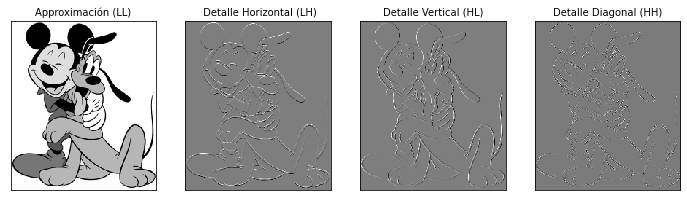

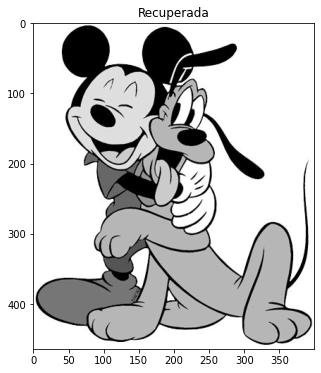

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data

original = cv2.imread('miki_pluto.jpg',0)
# Wavelet transform 
titles = ['Approximación (LL)', ' Detalle Horizontal (LH)',
          'Detalle Vertical (HL)', 'Detalle Diagonal (HH)']
coeffs2 = pywt.dwt2(original, 'db1')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 12))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
#Recuperar la imagen a partir de los coeficientes
rec=pywt.idwt2(coeffs2, 'db1')
plt.figure(figsize=(6, 6))
plt.imshow(rec,'gray'),plt.title('Recuperada')
    

La información se colocaría en una imagen de la siguiente forma

                            -------------------
                            |        |        |
                            | (LL)   |   (LH) |
                            |        |        |
                            -------------------
                            |        |        |
                            | (HL)   |   (HH) |
                            |        |        |
                            -------------------

Las bases  (o familias) que podemos usar para aplicar la transformada wavelet

In [4]:
 pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

Una familia concreta de wavelets

In [5]:
pywt.wavelist('db')

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

Ver los filtros concretos de una transformada

In [6]:
def format_array(arr):
    return "[%s]" % ", ".join(["%.14f" % x for x in arr])
wavelet = pywt.Wavelet('db1')
print(wavelet)
print("Filtros para analisis ",format_array(wavelet.dec_lo), format_array(wavelet.dec_hi))
print("Filtros para recuperacion ",format_array(wavelet.rec_lo), format_array(wavelet.rec_hi))

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Filtros para analisis  [0.70710678118655, 0.70710678118655] [-0.70710678118655, 0.70710678118655]
Filtros para recuperacion  [0.70710678118655, 0.70710678118655] [0.70710678118655, -0.70710678118655]


### Aplicar la transformada con diferentes niveles.

In [2]:
def imadjust(img, Out=(0,1.0), gamma=1.0):
    
    max_in = np.max(img)
    min_in = np.min(img)
    
    low_out, high_out = Out
 
    
    low_out *= 255.0
    high_out *= 255.0    
    
    k = (high_out - low_out) / (max_in - min_in)
         
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    h,w = img.shape[:2]
    imgOut = np.zeros((h,w),'float')
    
    for r in range(h):
        for c in range(w):
            res = int(k*(img[r,c]-min_in) + low_out)
            imgOut[r,c] = table[res]
               
    return imgOut


original (256, 256)
261 261
66 66
132 132


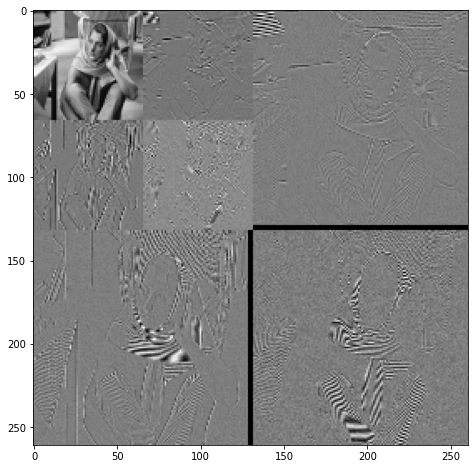

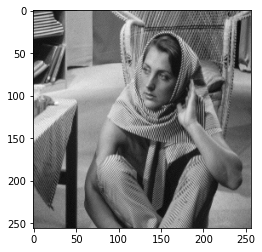

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

le=2
original = cv2.imread('barbara.png',0)
print("original", original.shape)
coeffs = pywt.wavedec2(original, 'db2',level=le)
tam_i = coeffs[0].shape[0]
tam_j = coeffs[0].shape[1]
for i in range(1,len(coeffs)):
    tam_i += coeffs[i][0].shape[0]
    tam_j += coeffs[i][0].shape[1] 
    
print(tam_i,tam_j)
img_l=np.zeros((tam_i,tam_j),dtype='float32')
dim_i=coeffs[0].shape[0]
dim_j=coeffs[0].shape[1]
ini_i=0;
ini_j=0;

cl = imadjust(coeffs[0], Out=(0,1), gamma=1)
img_l[ini_i:ini_i+dim_i,ini_j:ini_j+dim_j]=cl


for i in range(1,len(coeffs)):
    print(dim_i,dim_j)
    
    k_i=coeffs[i][0].shape[0]
    k_j=coeffs[i][0].shape[1] 
    
    
    cl = imadjust(coeffs[i][0], Out=(0,1), gamma=1)
    img_l[ini_i:ini_i+k_i,ini_j+dim_j:ini_j+dim_j+k_j]=cl
    cl = imadjust(coeffs[i][1], Out=(0,1), gamma=1)
    img_l[ini_i+dim_i:ini_i+dim_i+k_i,ini_j:ini_j+k_j]=cl
    cl = imadjust(coeffs[i][2], Out=(0,1), gamma=1)    
    img_l[ini_i+dim_i:ini_i+dim_i+k_i,ini_j+dim_j:ini_j+dim_j+k_j]=cl
    dim_i+=k_i
    dim_j+=k_j
plt.figure(figsize=(8,8))
plt.imshow(img_l,'gray')         
#Recuperar la informacion 
rec=pywt.waverec2(coeffs, 'db2')
plt.figure()
plt.imshow(rec,'gray')         


### Ejercicio. Aproximación a la Compresión
Realizar sobre la imagen barbara una descomposición wavelet usando bior3.7 con tres niveles. Fijado un porcentaje de coeficientes, por ejemplo 10% del total de coeficientes, que  indica el porcentaje de coeficientes que nos quedamos de entre todos los coeficientes wavelets de la descomposición. El resto los ponemos a cero. Los coeficientes que mantenemos son los que tiene mayor magnitud.
Varias el porcentaje a (10,20,30,40,50,70,80 90) para:
<ul>
<li>Obtener una gráfica en la que en el eje X tenemos razón de compresión y en el eje Y el valor de PSNR entre la imagen original y la imagen reconstruida.
<li>Obtener una gráfica en la que se muestra el porcentaje de coeficientes que se han mantenido por banda. 
</ul>    

*NO* se ejecuta correctamente

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

img = cv2.imread("barbara.png",0)
le=3
coeffs = pywt.wavedec2(img, 'bior3.7',level=le)

final = percentageWavelet(img, 0.1)

IndexError: invalid index to scalar variable.

In [276]:
def percentageWavelet(coeffs, percentage):
    coeffs0 = np.sort(abs(coeffs[0]))
    value = int(percentage * coeffs[0].shape[0])
    for i in range(coeffs0.shape[0]):
        coeffs0[i] = coeffs0[i][::-1]
        coeffs0[val:] = 0.0

        
    final = [coeffs0,coeffs[1],coeffs[2],coeffs[3]]
    
    return(final)

In [281]:
coeffs0 = np.sort(abs(coeffs[0]))
value = int(percentage * coeffs[0].shape[0])
for i in range(coeffs0.shape[0]):
    coeffs0[i] = coeffs0[i][::-1]
    coeffs0[value:] = 0.0

In [282]:
rec=pywt.waverec2(final, 'bior3.7')

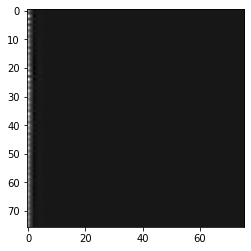

In [284]:
plt.imshow(rec,"gray")